In [75]:
import pandas as pd
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
meta_df = getDF('meta_Prime_Pantry.json.gz')
rows,columns=meta_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)
meta_df.head()


('Number of rows: ', 10815)
('Number of columns: ', 11)


,asin,description,title,also_buy,image,price,details,brand,also_view,rank,feature
0,B00005BPJO,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",[https://images-na.ssl-images-amazon.com/image...,$5.00,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Milk Duds,NaN,NaN,NaN
1,B00005BPJO,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",[https://images-na.ssl-images-amazon.com/image...,$5.00,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Milk Duds,NaN,NaN,NaN
2,B0000DIF38,[A perfect Lentil soup starts with Goya Lentil...,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",[https://images-na.ssl-images-amazon.com/image...,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Goya,"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",NaN,NaN
3,B0000DIWNI,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",[https://images-na.ssl-images-amazon.com/image...,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Saran,"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaN,NaN
4,B0000DIWNZ,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Saran,[B0014CZ0TE],NaN,NaN


In [4]:
#Number of unique user id  in the data
print('Number of unique product in Raw data = ', meta_df['asin'].nunique())

('Number of unique product in Raw data = ', 10814)


In [5]:
#Dropping unused variables
meta_df.drop(['description', 'brand', 'rank'
, 'feature', 'image', 'details'],axis=1,inplace=True)

In [6]:
meta_df.head(10)

,asin,title,also_buy,price,also_view
0,B00005BPJO,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",$5.00,NaN
1,B00005BPJO,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",$5.00,NaN
2,B0000DIF38,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",NaN,"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81..."
3,B0000DIWNI,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",NaN,"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9..."
4,B0000DIWNZ,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",NaN,NaN,[B0014CZ0TE]
5,B0000GH6UG,"Ibarra Mexican Chocolate, 19 oz",[B008MHKWLK],NaN,NaN
6,B0000KC2BK,"Knorr Granulated Bouillon, Chicken 15.9 oz",NaN,$3.09,NaN
7,B0001E1IN8,"Castillo Habanero Hot Sauce Red, 5 oz",NaN,NaN,NaN
8,B00032E8XK,"Chicken of the Sea, Solid White Albacore Tuna ...","[B000XDIDOO, B000WLEL84]",$1.48,"[B00OKB7W6A, B00OKB7CRE, B0014D0UBG, B07BQZHBV..."
9,B0005XMTHE,"Smucker's Concord Grape Jam, 32 oz",NaN,$2.29,"[B014M6LTSO, B00I8G6D6I, B00PC5CI8K, B01KPSBV9U]"


In [7]:
#Remove duplicates asin
meta_df.drop_duplicates(subset ="asin", keep = 'first', inplace = True) 
rows,columns=meta_df.shape

In [8]:
df2 = meta_df.set_index("asin", drop = False)
unique_asin = df2['asin'].unique()

In [9]:
# Replace product asin into title
title = meta_df[['title']]
type(title)



pandas.core.frame.DataFrame

In [10]:
# Function to replace asin by title
def replace_with_title(col_index):
    ret = []
    for i in range(0, rows):
        t_list = []
        asin_list = meta_df.values[i,col_index]
        if type(asin_list) != float:
            for item in asin_list:
                if item in unique_asin:
                    tit = df2.loc[str(item), 'title']
                    t_list.append(tit)
                else:
                    t_list.append(item)
        ret.append(t_list)   
    return ret

# Replace title for also buy
ab_list = replace_with_title(2)

# Replace title for also view
av_list = replace_with_title(4)

# Problem, there are also buy and view products that belong to different categories

In [11]:
title['also_buy'] = ab_list
title['also_view'] = av_list

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
title

,title,also_buy,also_view
0,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[Fritos Original Corn Chips, 9.25 Ounce, B007N...",[]
2,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]","[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81..."
3,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...","[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9..."
4,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],[Glad ClingWrap Plastic Wrap - 200 Square Foot...
5,"Ibarra Mexican Chocolate, 19 oz",[B008MHKWLK],[]
6,"Knorr Granulated Bouillon, Chicken 15.9 oz",[],[]
7,"Castillo Habanero Hot Sauce Red, 5 oz",[],[]
8,"Chicken of the Sea, Solid White Albacore Tuna ...","[Joy Dishwashing Liquid, Lemon Scent, 30 Ounce...",[Chicken of the Sea White Albacore Tuna in Wat...
9,"Smucker's Concord Grape Jam, 32 oz",[],"[Jif Creamy Peanut Butter Twin Pack, 80 Ounce,..."
10,"Snapple Peach Tea, 32 fl oz bottle","[B0041LYS66, Sweet Baby Ray's Barbecue Sauce, ...","[B0041LYS66, B011ENMK1S]"


In [13]:
def together_product(df, col_index):
    ret = []
    for i in range(0, rows):
        item = [df.values[i, 0]]
        prod = df.values[i, col_index]
        if type(prod) != float:
            item += prod
        ret.append(item)
    return ret

In [14]:
# Create also buy table 
# type(asin) = unicode
also_buy = together_product(title, 1) #Or replace title with meta_df

In [15]:
# Create also buy table
also_view = together_product(title, 2)

In [16]:
len(also_view)

10814

[[u"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween Candy)"],
 [u'Goya Dry Lentils, 16 oz',
  u'B074MFVZG7',
  u'B079PTH69L',
  u'B000VDRKEK',
  u'B074M9T81V',
  u'B074M9P1L1',
  u'B074MFKJGB'],
 [u'Saran Premium Plastic Wrap, 100 Sq Ft',
  u'B077QLSLRQ',
  u'B00JPKW1RQ',
  u'B000FE2IK6',
  u'B00XUJHJ9I',
  u'B077QLRDHF',
  u'B004NG9134',
  u'B01AYGHV3I',
  u'B00WFA92TI',
  u'B00OD2EAY8',
  u'B01FDB1TGO',
  u'B009POH9EW',
  u'B0195R5YSQ',
  u'B007MWNFBA',
  u'B001L68ARC',
  u'B07FWRRD2F',
  u'B000GCOLZ2',
  u'B00J5IMDMG',
  u'B001JB34OI',
  u'B0014D5OA8',
  u'B00ASBOT2Q',
  u'B000R8JOUC'],
 [u'Saran Cling Plus Plastic Wrap, 200 Sq Ft',
  u'Glad ClingWrap Plastic Wrap - 200 Square Foot Roll'],
 [u'Ibarra Mexican Chocolate, 19 oz'],
 [u'Knorr Granulated Bouillon, Chicken 15.9 oz'],
 [u'Castillo Habanero Hot Sauce Red, 5 oz'],
 [u'Chicken of the Sea, Solid White Albacore Tuna in Water, 5 Oz',
  u'Chicken of the Sea White Albacore Tuna in Water, Solid, 5 Ounce Cans (Pack of 4)',
  u'Chicken O
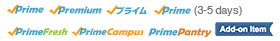
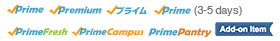

In [17]:
also_view

In [18]:
len(also_buy)

10814

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

In [115]:
av_association_rules = apriori(also_view, min_support=0.008, min_confidence=0.2, min_lift=30, min_length=2)
av_association_results = list(av_association_rules)

In [117]:
print(len(av_association_results))
print(av_association_results[51])

52
RelationRecord(items=frozenset([u'B01L1GEY8U', u'B01LWDYLAH', u'B01LRVW9CM', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), support=0.008415017569816904, ordered_statistics=[OrderedStatistic(items_base=frozenset([u'B01L1GEY8U']), items_add=frozenset([u'B01LWDYLAH', u'B01LRVW9CM', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), confidence=0.46428571428571425, lift=50.20785714285714), OrderedStatistic(items_base=frozenset([u'B01LRVW9CM']), items_add=frozenset([u'B01L1GEY8U', u'B01LWDYLAH', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), confidence=0.7000000000000001, lift=66.98938053097346), OrderedStatistic(items_base=frozenset([u'B01LWDYLAH']), items_add=frozenset([u'B01L1GEY8U', u'B01LRVW9CM', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), confidence=0.41743119266055045, lift=47.5168517624336), OrderedStatistic(items_base=frozenset([u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), items_add=frozenset([u'B01L1GEY8U', u'B01LWDYLAH', u'B01LRVW9CM']), confidence=0.5141242937853108, lift=57

In [107]:
av_df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in av_association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

av_df['Items'] = list(map(set, Items))                                   
av_df['Antecedent'] = list(map(set, Antecedent))
av_df['Consequent'] = list(map(set, Consequent))
av_df['Support'] = Support
av_df['Confidence'] = Confidence
av_df['Lift']= Lift

av_df = av_df.round({'Support': 4, 'Confidence':4, 'Lift': 4})
av_df.sort_values(by ='Lift', ascending = False, inplace = True)
av_df.drop_duplicates('Lift', inplace=True)

In [108]:
av_df.head(10)

,Items,Antecedent,Consequent,Support,Confidence,Lift
237,"{B01L1GEY8U, B01LWDYLAH, B01LRVW9CM, Jell-O Ra...","{B01LWDYLAH, Jell-O Raspberry Gelatin Mix 3 Ou...","{B01L1GEY8U, B01LRVW9CM}",0.0084,0.6691,70.9396
235,"{B01L1GEY8U, B01LWDYLAH, B01LRVW9CM, Jell-O Ra...","{B01LWDYLAH, B01LRVW9CM}","{B01L1GEY8U, Jell-O Raspberry Gelatin Mix 3 Ou...",0.0084,0.8053,69.1160
233,"{B01L1GEY8U, B01LWDYLAH, B01LRVW9CM, Jell-O Ra...","{B01L1GEY8U, B01LWDYLAH}","{B01LRVW9CM, Jell-O Raspberry Gelatin Mix 3 Ou...",0.0084,0.6691,68.2626
154,"{B01L1GEY8U, B01LRVWLLG, Jell-O Raspberry Gela...","{B01L1GEY8U, Jell-O Raspberry Gelatin Mix 3 Ou...",{B01LRVWLLG},0.0081,0.6984,68.0418
229,"{B01L1GEY8U, B01LWDYLAH, B01LRVW9CM, Jell-O Ra...",{B01LRVW9CM},"{B01L1GEY8U, B01LWDYLAH, Jell-O Raspberry Gela...",0.0084,0.7000,66.9894
198,"{B01LRVWLLG, B01LWDYLAH, Jell-O Raspberry Gela...",{B01LRVWLLG},"{B01LWDYLAH, Jell-O Raspberry Gelatin Mix 3 Ou...",0.0085,0.8288,65.9041
145,"{B01L1GEY8U, B01LRVW9CM, Jell-O Raspberry Gela...",{B01LRVW9CM},"{B01L1GEY8U, Jell-O Raspberry Gelatin Mix 3 Ou...",0.0088,0.7308,62.7186
197,"{B01LWDYLAH, B01LRVW9CM, Jell-O Raspberry Gela...","{B01LWDYLAH, Jell-O Raspberry Gelatin Mix 3 Ou...",{B01LRVW9CM},0.0092,0.7353,61.1652
153,"{B01L1GEY8U, B01LRVWLLG, Jell-O Raspberry Gela...","{B01L1GEY8U, B01LRVWLLG}",{Jell-O Raspberry Gelatin Mix 3 Ounce Box},0.0081,0.9888,60.4096
200,"{B01LRVWLLG, B01LWDYLAH, Jell-O Raspberry Gela...",{Jell-O Raspberry Gelatin Mix 3 Ounce Box},"{B01LRVWLLG, B01LWDYLAH}",0.0085,0.5198,59.1667


In [49]:
av_df.values.tolist()

[[{u'B01L1GEY8U',
   u'B01LRVW9CM',
   u'B01LWDYLAH',
   u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  {u'B01LWDYLAH', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  {u'B01L1GEY8U', u'B01LRVW9CM'},
  0.008415017569816904,
  0.6691176470588236,
  70.9395905420992],
 [{u'B01L1GEY8U',
   u'B01LRVW9CM',
   u'B01LWDYLAH',
   u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  {u'B01L1GEY8U', u'B01LRVW9CM'},
  {u'B01LWDYLAH', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  0.008415017569816904,
  0.8921568627450981,
  70.9395905420992],
 [{u'B01L1GEY8U',
   u'B01LRVW9CM',
   u'B01LWDYLAH',
   u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  {u'B01LRVW9CM', u'B01LWDYLAH'},
  {u'B01L1GEY8U', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  0.008415017569816904,
  0.8053097345132744,
  69.11602753195673],
 [{u'B01L1GEY8U',
   u'B01LRVW9CM',
   u'B01LWDYLAH',
   u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  {u'B01L1GEY8U', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box'},
  {u'B01LRVW9CM', u'B01LWDYL

TypeError: 'generator' object has no attribute '__getitem__'

In [37]:
ab_association_rules = apriori(also_buy, min_support=0.05, min_confidence=0.2, min_lift=1, min_length=2)
ab_association_results = list(ab_association_rules)

In [51]:
print(len(ab_association_results))
print(ab_association_results[236])

354
RelationRecord(items=frozenset([u'B00RBFGAX8', u'B072FJR9HB', u'Q-tips Cotton Swabs, Original, 750 ct']), support=0.062234140928426114, ordered_statistics=[OrderedStatistic(items_base=frozenset([u'B00RBFGAX8']), items_add=frozenset([u'B072FJR9HB', u'Q-tips Cotton Swabs, Original, 750 ct']), confidence=0.4689895470383275, lift=6.872158484651048), OrderedStatistic(items_base=frozenset([u'B072FJR9HB']), items_add=frozenset([u'B00RBFGAX8', u'Q-tips Cotton Swabs, Original, 750 ct']), confidence=0.6533980582524272, lift=8.887857360933017), OrderedStatistic(items_base=frozenset([u'Q-tips Cotton Swabs, Original, 750 ct']), items_add=frozenset([u'B00RBFGAX8', u'B072FJR9HB']), confidence=0.7420066152149946, lift=9.59815734083128), OrderedStatistic(items_base=frozenset([u'B00RBFGAX8', u'B072FJR9HB']), items_add=frozenset([u'Q-tips Cotton Swabs, Original, 750 ct']), confidence=0.8050239234449761, lift=9.598157340831282), OrderedStatistic(items_base=frozenset([u'B00RBFGAX8', u'Q-tips Cotton Swa

In [65]:
def print_assoc(association_results):
    for item in association_results[84:]:
        print item
        # first index of the inner list
        # Contains base item and add item
        pair = item[0]
        print pair
        items = [x for x in pair]
        print item[1]
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [66]:
print_assoc(av_association_results)
#print_assoc(ab_association_results)

RelationRecord(items=frozenset([u'B01L1GEY8U', u'B01LWDYLAH', u'B01LRVW9CM', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), support=0.008415017569816904, ordered_statistics=[OrderedStatistic(items_base=frozenset([u'B01L1GEY8U']), items_add=frozenset([u'B01LWDYLAH', u'B01LRVW9CM', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), confidence=0.46428571428571425, lift=50.20785714285714), OrderedStatistic(items_base=frozenset([u'B01LRVW9CM']), items_add=frozenset([u'B01L1GEY8U', u'B01LWDYLAH', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), confidence=0.7000000000000001, lift=66.98938053097346), OrderedStatistic(items_base=frozenset([u'B01LWDYLAH']), items_add=frozenset([u'B01L1GEY8U', u'B01LRVW9CM', u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), confidence=0.41743119266055045, lift=47.5168517624336), OrderedStatistic(items_base=frozenset([u'Jell-O Raspberry Gelatin Mix 3 Ounce Box']), items_add=frozenset([u'B01L1GEY8U', u'B01LWDYLAH', u'B01LRVW9CM']), confidence=0.5141242937853108, lift=57.91

In [41]:
print_assoc(ab_association_results)

Rule: B000WHXN3C -> B00I8DS5DA
Support: 0.0634362862955
Confidence: 0.736842105263
Lift: 5.5450316815
Rule: B000WHXN3C -> B00IA6IBP2
Support: 0.0510449417422
Confidence: 0.59291084855
Lift: 5.92034895311
Rule: B000WHXN3C -> B00RBFGAX8
Support: 0.0657481043092
Confidence: 0.763694951665
Lift: 5.75512000509
Rule: B000WHXN3C -> B01DBKRWWY
Support: 0.058442759386
Confidence: 0.678839957035
Lift: 5.85871930996
Rule: B000WHXN3C -> B072FJR9HB
Support: 0.0525245052709
Confidence: 0.610096670247
Lift: 6.40542271073
Rule: B00I6A69TM -> B00I8DS5DA
Support: 0.0676900314407
Confidence: 0.526240115025
Lift: 3.96016743485
Rule: B00I6A69TM -> B00RBFGAX8
Support: 0.0681523950435
Confidence: 0.52983465133
Lift: 3.99277485678
Rule: B00I6A69TM -> B00YEGNX1Y
Support: 0.0566857776956
Confidence: 0.440690150971
Lift: 4.86784810275
Rule: B00I6A69TM -> B01DBKRWWY
Support: 0.0510449417422
Confidence: 0.396836808052
Lift: 3.42489484619
Rule: B00I6A69TM -> B06XGYB161
Support: 0.0740706491585
Confidence: 0.5758447

Rule: B00RBFGAX8 -> B01DBKRWWY
Support: 0.0523395598299
Confidence: 0.522622345337
Lift: 9.1155452298
Rule: B00RBFGAX8 -> B01DBKRWWY
Support: 0.0542814869613
Confidence: 0.542012927054
Lift: 9.0174273741
Rule: Q-tips Cotton Swabs, Original, 750 ct -> B00RBFGAX8
Support: 0.0518771962271
Confidence: 0.390940766551
Lift: 7.1292301003
Rule: B072FJR9HB -> B01DBKRSHI
Support: 0.0519696689477
Confidence: 0.391092553932
Lift: 7.43282052411
Rule: B01DBKRSHI -> B00I8DS5DA
Support: 0.0511374144627
Confidence: 0.384829505915
Lift: 7.35255525966
Rule: B072FJR9HB -> B00I8DS5DA
Support: 0.053541705197
Confidence: 0.402922755741
Lift: 7.42283931956
Rule: B072FJR9HB -> B01DBKRSHI
Support: 0.0509524690216
Confidence: 0.383437717467
Lift: 7.3912575342
